In [1]:
import matplotlib as mp
import seaborn as sb
import pandas as pd 
import numpy as np
from numpy import math
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [3]:
df=pd.read_csv("mail_data.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
#now we have to fulfill the space in the mails.

df=df.where((pd.notnull(df)),'')

In [7]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


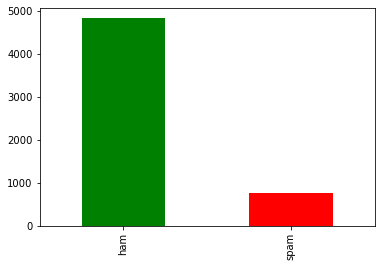

In [9]:
df["Category"].value_counts().plot(kind="bar",color=["green","red"])
plt.show()

In [11]:
#label_encoding
#spam_mail==0;
#ham_mail==1;
df.loc[df["Category"]=="spam","Category",]=0
df.loc[df["Category"]=="ham","Category",]=1
df.head()



,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
X=df["Message"]
y=df["Category"]

In [13]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vec= TfidfVectorizer(min_df=1,stop_words="english",lowercase="True")
X=vec.fit_transform(X)


AttributeError: lower not found

In [23]:
print(X)

  (0, 8079)	0.1961033223643189
  (0, 1061)	0.35097479377088364
  (0, 3511)	0.16453831818791093
  (0, 2003)	0.29650492406235857
  (0, 1713)	0.3350433781715565
  (0, 4370)	0.29650492406235857
  (0, 8281)	0.23740715800944148
  (0, 3551)	0.19387866945820545
  (0, 1715)	0.29650492406235857
  (0, 1281)	0.26251769953088055
  (0, 2278)	0.27180581777101714
  (0, 5775)	0.27451666535585145
  (0, 4244)	0.35097479377088364
  (1, 5399)	0.5466243141314314
  (1, 8187)	0.43162957585464123
  (1, 4212)	0.5236804332035243
  (1, 4406)	0.4083258549263009
  (1, 5373)	0.2718944069420321
  (2, 77)	0.23775471426296338
  (2, 1138)	0.1708958200698438
  (2, 6100)	0.1708958200698438
  (2, 7750)	0.12585247610650566
  (2, 7073)	0.19910160498748308
  (2, 6048)	0.1809617113309815
  (2, 6154)	0.16925521015250053
  :	:
  (5567, 464)	0.2345392769367673
  (5567, 5146)	0.2445509910362817
  (5567, 8256)	0.1919079652601193
  (5567, 2009)	0.18662411374983587
  (5567, 5930)	0.1961944081157334
  (5567, 6100)	0.23094798261273555


In [24]:
y


0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=42)

In [43]:
le=LogisticRegression()
print(X_train)

  (0, 6135)	0.2897881406295265
  (0, 6067)	0.2508278335044997
  (0, 5995)	0.3100512017261638
  (0, 5163)	0.22431851276611645
  (0, 4741)	0.25561137720916743
  (0, 4721)	0.2072885893368586
  (0, 4468)	0.2236645300617945
  (0, 2390)	0.41265920061767897
  (0, 1876)	0.4322812724276166
  (0, 1648)	0.2623435998961981
  (0, 1220)	0.3497817211349487
  (1, 5612)	0.28428424061379487
  (1, 5013)	0.3051452567402258
  (1, 4584)	0.3661172687048378
  (1, 3529)	0.40796599142057416
  (1, 3020)	0.23212250223776434
  (1, 2910)	0.18600920992541858
  (1, 2457)	0.206149222039441
  (1, 2394)	0.2657658858057981
  (1, 1709)	0.3894476366125774
  (1, 1580)	0.2678422380164615
  (1, 1479)	0.21392921558197744
  (1, 163)	0.23410854916427504
  (2, 5563)	0.4438954543237544
  (2, 5389)	0.3623964470602423
  :	:
  (4452, 4986)	0.27113640486599605
  (4452, 3679)	0.2998284424944019
  (4452, 3487)	0.2476830055833242
  (4452, 3057)	0.3939591978513729
  (4452, 2412)	0.242889967446655
  (4452, 2208)	0.2103718390782575
  (4452,

In [36]:
port_stem=PorterStemmer()

In [49]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [50]:
df["Message"]=df["Message"].apply(stemming)

In [51]:
X=df["Message"].values
y=df["Category"].values

In [52]:
print(X)
print(y)

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat'
 'ok lar joke wif u oni'
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli'
 ... 'piti mood suggest'
 'guy bitch act like interest buy someth el next week gave us free'
 'rofl true name']
[1 1 0 ... 1 1 1]


In [53]:
vec= TfidfVectorizer()
vec.fit(X)
X=vec.transform(X)
print(X)

  (0, 6088)	0.23616756554565888
  (0, 5914)	0.19460776670194488
  (0, 4061)	0.24055424511726686
  (0, 2914)	0.28506031120996994
  (0, 2809)	0.3522946643655987
  (0, 2233)	0.19460776670194488
  (0, 2196)	0.1649859743034801
  (0, 2159)	0.14066343975170745
  (0, 1161)	0.27282796669086984
  (0, 956)	0.29761995607435426
  (0, 731)	0.29761995607435426
  (0, 729)	0.33630333732147566
  (0, 372)	0.26350491969128115
  (0, 186)	0.3522946643655987
  (1, 6010)	0.44597659211687757
  (1, 3760)	0.564793662023427
  (1, 3735)	0.2809319560263009
  (1, 2942)	0.4218982744467187
  (1, 2776)	0.4745440766926726
  (2, 6054)	0.21369536090695063
  (2, 6020)	0.16011115093017092
  (2, 5654)	0.13727833879237866
  (2, 5495)	0.2476330040187214
  (2, 5381)	0.1320245012320154
  (2, 5095)	0.22058857181065877
  :	:
  (5567, 776)	0.15667410716389937
  (5567, 717)	0.2920652264491494
  (5568, 2444)	0.37457404553349233
  (5568, 2159)	0.29597505521175127
  (5568, 1984)	0.5740672391289212
  (5568, 1693)	0.6652366917601374
  (5

In [54]:
y=y.astype("int")

In [56]:
le=LogisticRegression()
y_train


array([0, 1, 1, ..., 1, 1, 1])

In [57]:
le.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred=le.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred)

0.9641255605381166

In [61]:
from sklearn.ensemble import RandomForestClassifier
ran_f=RandomForestClassifier()
ran_f.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
y_pred1=ran_f.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred1)

0.97847533632287